In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()#for plot styling

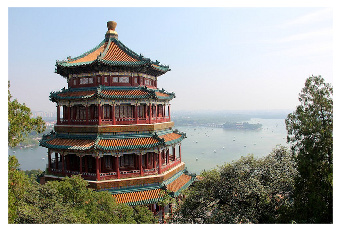

In [2]:
from sklearn.datasets import load_sample_image
china=load_sample_image("china.jpg")
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china);

In [3]:
china.shape

(427, 640, 3)

In [4]:
data=china/255
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [35]:
rng=np.random.RandomState(0)
i=rng.permutation(data.shape[0])[:10000]
print(i.shape)
i

(10000,)


array([101521, 233130, 175683, ...,  21042,  71188,  28548])

In [36]:
colors=data[i]
colors.shape

(10000, 3)

In [37]:
data.shape

(273280, 3)

In [8]:
 R,G,B =data[i].T
G.shape

(10000,)

In [46]:
def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B =data[i].T
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker=',')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B,color=colors,marker=',')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=20)

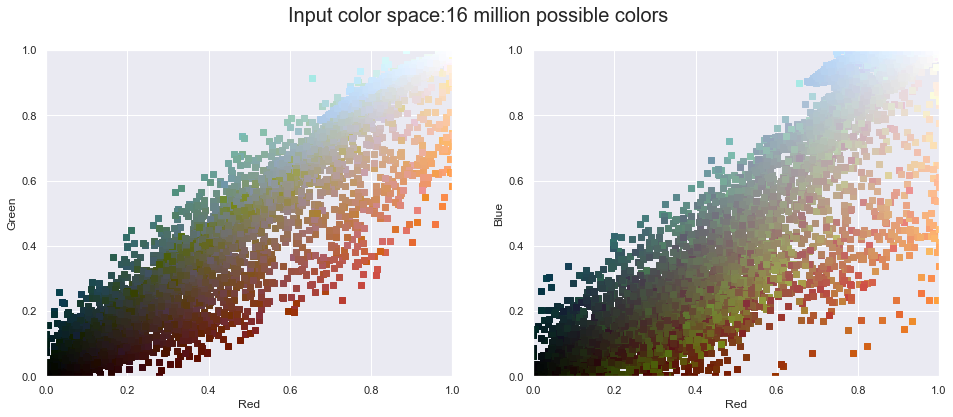

In [47]:
plot_pixels(data,title='Input color space:16 million possible colors')

In [17]:
#import warning;warnings.simplefilter('ignore') #fix numpy issues
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=16, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [22]:
y_pred=kmeans.predict(data)#max of y_pred is 16
y_pred


array([ 5,  5,  5, ...,  7, 13,  3])

In [25]:
centroids=kmeans.cluster_centers_
centroids

array([[0.85295201, 0.90989059, 0.97038241],
       [0.26263617, 0.26819172, 0.24266521],
       [0.51996435, 0.51483957, 0.42794118],
       [0.10553164, 0.09347999, 0.06395664],
       [0.46602379, 0.44268724, 0.23439409],
       [0.77388733, 0.82768441, 0.88524743],
       [0.94832357, 0.96041083, 0.98193702],
       [0.19410431, 0.17236228, 0.11999466],
       [0.63313049, 0.31913455, 0.23150778],
       [0.8452381 , 0.58067227, 0.39663866],
       [0.36772742, 0.2852459 , 0.13719061],
       [0.59855825, 0.62681661, 0.59648212],
       [0.36115196, 0.39117647, 0.35851716],
       [0.03317186, 0.0350173 , 0.01647059],
       [0.94509804, 0.8       , 0.66013072],
       [0.70513264, 0.74653979, 0.73973472]])

In [31]:
new_colors=centroids[y_pred]#making new colors from 16 centroids rgb combinations
print(new_colors.shape)
new_colors


(273280, 3)


array([[0.77388733, 0.82768441, 0.88524743],
       [0.77388733, 0.82768441, 0.88524743],
       [0.77388733, 0.82768441, 0.88524743],
       ...,
       [0.19410431, 0.17236228, 0.11999466],
       [0.03317186, 0.0350173 , 0.01647059],
       [0.10553164, 0.09347999, 0.06395664]])

In [48]:
kmeans.labels_

array([ 5,  5,  5, ...,  7, 13,  3])

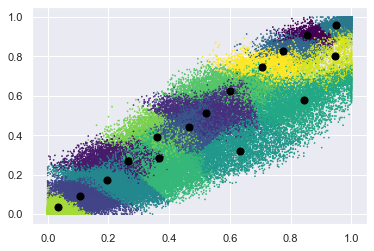

In [57]:
plt.scatter(data[:,0],data[:,1],c=y_pred,s=2,cmap='viridis',marker='.')
plt.scatter(centroids[:,0],centroids[:,1],c='black',s=50,alpha=1)

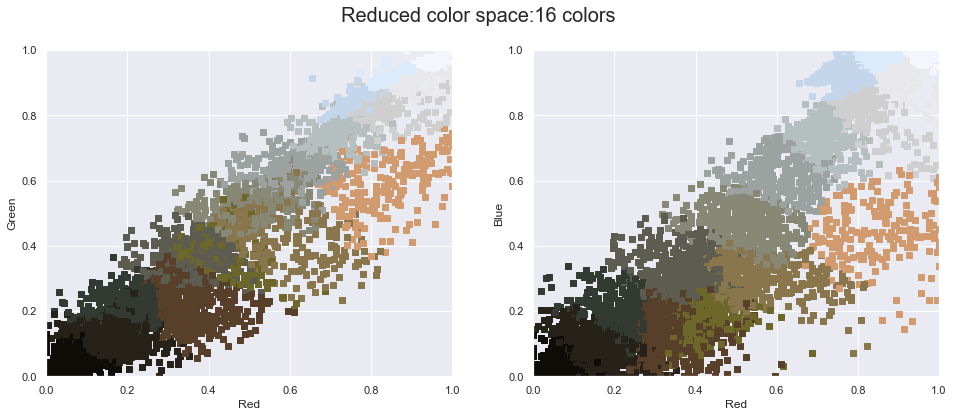

In [15]:
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors=new_colors,title="Reduced color space:16 colors")


Text(0.5, 1.0, '16-color Image')

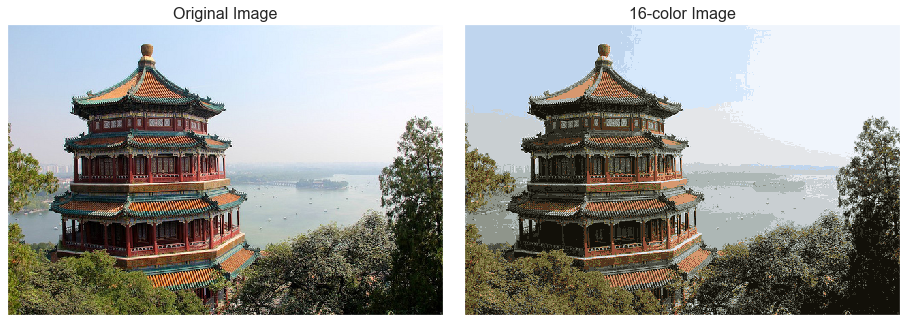

In [12]:
china_recolored=new_colors.reshape(china.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image',size=16)

ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image',size=16)
